In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Load the dataset
dataset = pd.read_csv('Mall_Customers.csv') 
# Select the features for clustering
X = dataset.iloc[:, 3:5].values

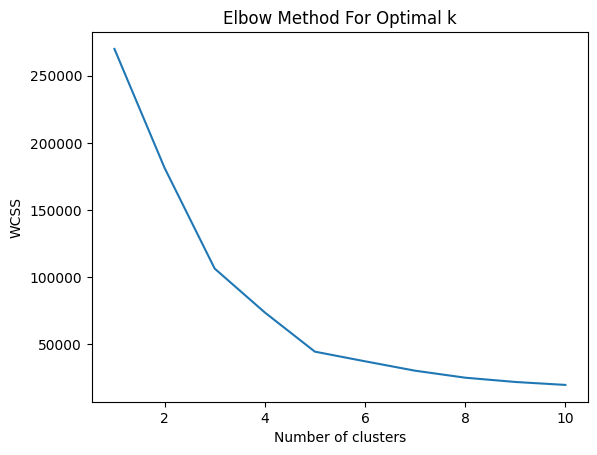

In [9]:
# write the code for finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    
# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k') 
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

c:\Users\Z0031XFH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


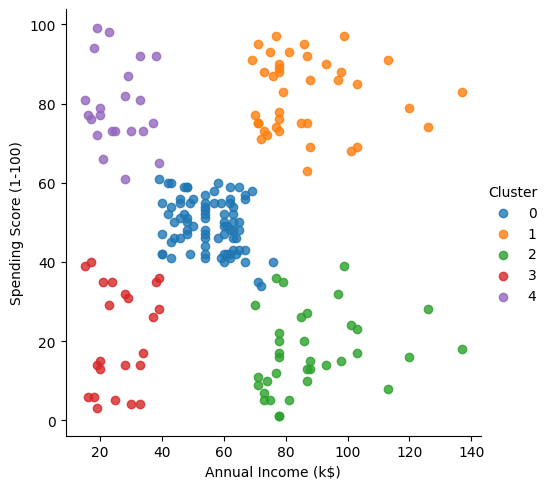

In [10]:
# Visualizing the clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)        
# Create a DataFrame to hold the results
supervised = pd.DataFrame(dataset)
supervised['Cluster'] = y_kmeans
# Save the DataFrame to a CSV file
supervised.to_csv('supervised.csv', index=False)
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_
# Visualize the clusters using seaborn
import seaborn as sns
facet = sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=supervised, hue='Cluster', fit_reg=False, legend=True, legend_out=True)
# Show the plot
plt.show()